# Cost-Accuracy Tradeoff for Operator Learning Models
## Problem Overview
- The project aims at exploring the cost-accuracy trade-off in operator learning, inspired by the paper *"The Cost-Accuracy Trade-off in Operator Learning with Neural Networks."*
- Considering functions constructed from sine and cosine basis:
$$
          u(x) = p_{sin} * sin(x) + p_{cos} * cos(x)
$$
- The goal is to learn an operator that maps $u(x)$ to its derivative:
$$
v(x)=\frac{du}{dx} = 1_{\sin} \cdot \sin(x) +q_{\cos} \cdot \cos(x)
$$

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
# --- Load Results from sweep_results folders ---
def load_sweep_results(name):
    folder = f"models/{name}/sweep_results"
    data = []
    for file in os.listdir(folder):
        if file.endswith("_results.txt"):
            with open(os.path.join(folder, file)) as f:
                line = f.read().strip()
                flops, err = map(float, line.split(","))
                data.append((flops, err))
    return sorted(data)

# Load results for all models
results = {
    "pca_net": load_sweep_results("pca_net"),
    "deep_onet": load_sweep_results("deep_onet"),
    "para_net": load_sweep_results("para_net")
}

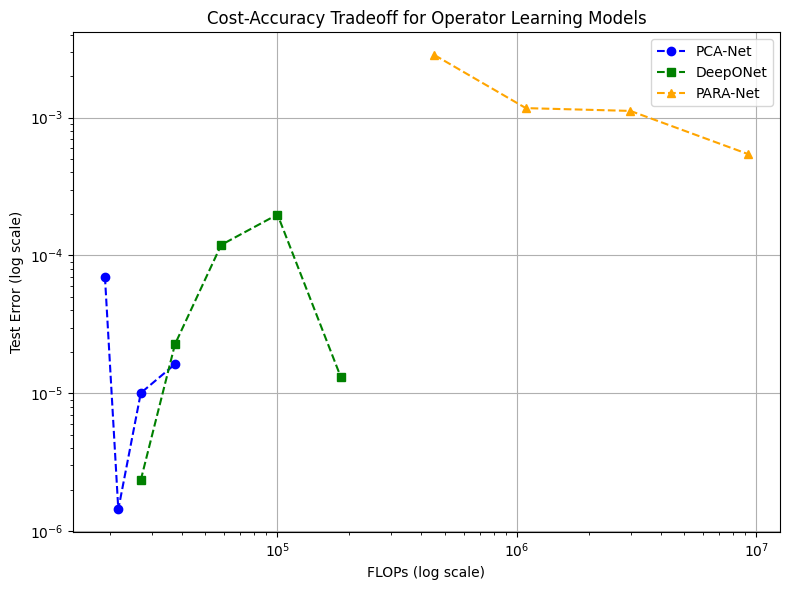

In [3]:
# --- Plot Configuration ---
labels = {
    "pca_net": "PCA-Net",
    "deep_onet": "DeepONet",
    "para_net": "PARA-Net"
}

colors = {
    "pca_net": "blue",
    "deep_onet": "green",
    "para_net": "orange"
}

markers = {
    "pca_net": "o",
    "deep_onet": "s",
    "para_net": "^"
}

# --- Plotting ---
plt.figure(figsize=(8, 6))

for name in results:
    flops, errors = zip(*results[name])
    
    for (x, y), width in zip(results[name], [16, 32, 64, 128, 256]):  
        plt.annotate(f"w={width}", (x, y), textcoords="offset points", xytext=(5, -10), fontsize=9)
    
    plt.plot(flops, errors, linestyle="--", marker=markers[name],
             label=labels[name], color=colors[name])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("FLOPs (log scale)")
plt.ylabel("Test Error (log scale)")
plt.title("Cost-Accuracy Tradeoff for Operator Learning Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comment:
#### PCA-Net:
- The Test error drops quickly and then saturate
- The lowest cost configurations alrady achieve excellent accuracy
#### DeepONet:
- Test error improves significantly at higher cost
- The bump shows that some widths may not be optimal for this task
- It's sensitive to hyperparameters
#### PARA-Net:
- The test error is much higher compared to the other two
- PARA-Net is not efficient to deal with this problem, which has smooth output